# Myers EDA - Core Tree Metrics

**Objectives:**
Analyze fundamental tree characteristics including size, species composition, and maintenance factors.

**Key Metrics:**
1. **Size**: DBH, Height, Crown Width.
2. **Species**: Top 20 most common species.
3. **Environment**: Growing Space types.
4. **Maintenance**: Pruning Cycles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Setup Path safely
current_dir = os.getcwd()
scripts_path = os.path.join(current_dir, '..', 'scripts')
if scripts_path not in sys.path:
    sys.path.append(os.path.abspath(scripts_path))

try:
    from load_data import load_data
    df = load_data()
    print(f"Data Loaded Successfully: {df.shape}")
    print("Columns:", df.columns.tolist())
except Exception as e:
    print(f"Error loading data: {e}")
    df = pd.DataFrame()

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Data Loaded Successfully: (1500, 37)
Columns: ['Site ID', 'Quarter Section', 'Address', 'Street', 'Side', 'Site', 'On Street', 'Species', 'DBH', 'Latitude', 'Longitude', 'Inventory Date', 'Species to Plant', 'Condition', 'Alder', 'Closest Cross Street', 'Crown Width', 'Damage', 'Direction from Cross Street', 'Disease', 'Distance from Cross Street', 'District', 'Growing Space', 'Height', 'Property Type', 'Pruning Cycle', 'Reason to Remove', 'Side of Street', 'Site Type', 'Valuation Total', 'Site Last Changed On', 'Site Comments', 'Census Block: Disadvantaged Area', 'Census Block ID', 'Full Name', 'Abbreviation', 'Scientific Name']


## 1. Size Distributions
Analyzing the physical dimensions of the trees: **DBH (Diameter at Breast Height)**, **Height**, and **Crown Width**.

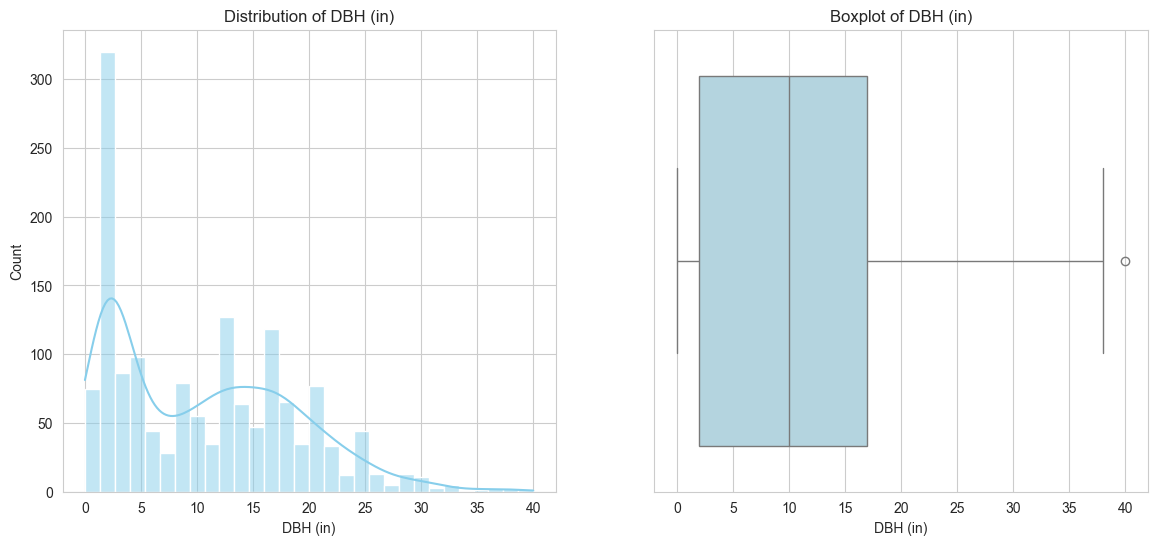

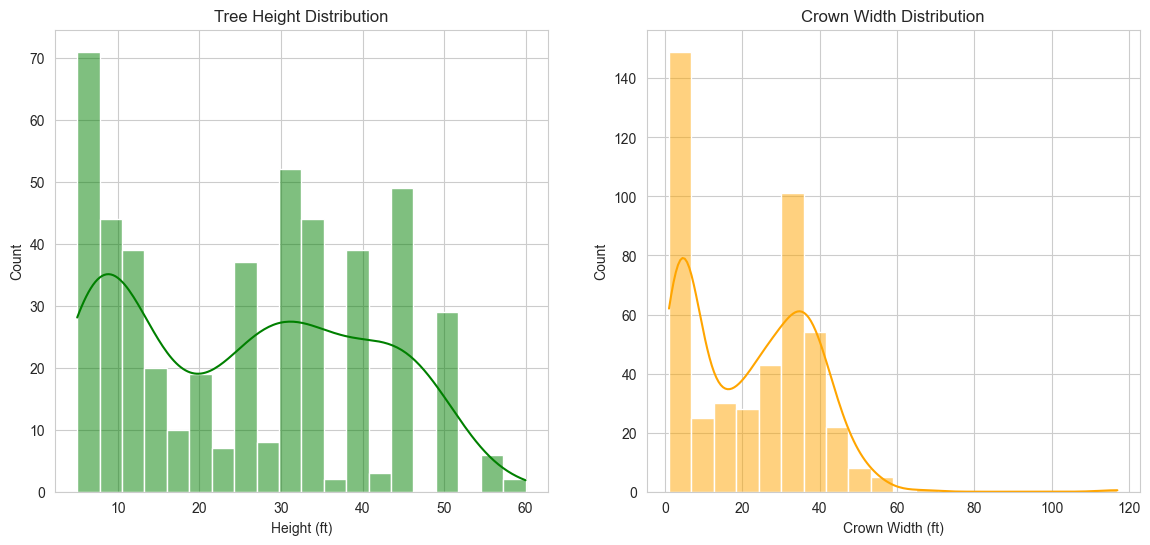

In [12]:
if not df.empty:
    df['DBH (in)'] = pd.to_numeric(df['DBH'], errors='coerce')
    df.drop(columns='DBH')

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['DBH (in)'].dropna(), bins=30, kde=True, color='skyblue')
    plt.title('Distribution of DBH (in)')
    plt.xlabel('DBH (in)')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['DBH (in)'], color='lightblue')
    plt.title('Boxplot of DBH (in)')
    plt.xlabel('DBH (in)')
    plt.show()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Height'].dropna(), bins=20, kde=True, color='green')
    plt.title('Tree Height Distribution')
    plt.xlabel('Height (ft)')

    plt.subplot(1, 2, 2)
    sns.histplot(df['Crown Width'].dropna(), bins=20, kde=True, color='orange')
    plt.title('Crown Width Distribution')
    plt.xlabel('Crown Width (ft)')
    plt.show()

## 2. Species Composition
Identifying the most common tree species in the dataset.

In [3]:
if not df.empty and 'Species' in df.columns:
    top_species = df['Species'].value_counts().head(20)
    print("Top 5 Species:\n", top_species.head(5))
else:
    print("Species column missing or no data.")

Top 5 Species:
 Species
MAPLE, NORWAY (NOR) (ACER PLATANOIDES)                                     436
ASH, GREEN (GRA) (FRAXINUS PENNSYLVANICA)                                  181
HONEYLOCUST, THORNLESS (LOC) (GLEDITSIA TRIACANTHOS INERMIS)               111
HACKBERRY, AMERICAN (HAC) (CELTIS OCCIDENTALIS)                             83
LILAC, JAPANESE TREE IVORY SILK (ITL) (SYRINGA RETICULATA (IVORY SILK))     40
Name: count, dtype: int64


## 3. Environment & Maintenance
Examining the **Growing Space** types and **Pruning Cycles**.

C:\Users\myersjr\AppData\Local\Temp\ipykernel_12844\931009762.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Growing Space'], order=space_counts.index, ax=ax[0], legend=False, palette='pastel')
C:\Users\myersjr\AppData\Local\Temp\ipykernel_12844\931009762.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pruning Cycle'], order=pruning_counts.index, ax=ax[1], palette='muted')


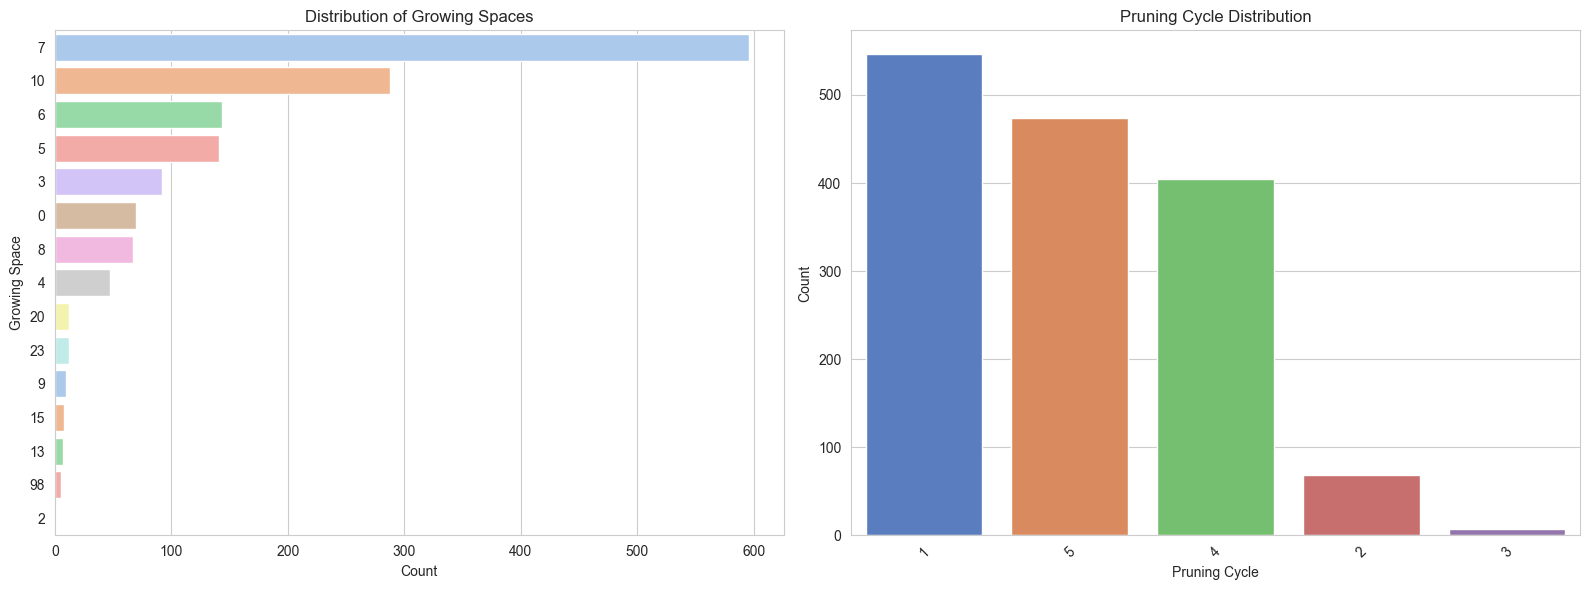

In [ ]:
if not df.empty:
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    space_counts = df['Growing Space'].value_counts()
    sns.countplot(y=df['Growing Space'], order=space_counts.index, ax=ax[0], legend=False, palette='pastel')
    ax[0].set_title('Distribution of Growing Spaces')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Growing Space')

    pruning_counts = df['Pruning Cycle'].value_counts()
    sns.countplot(x=df['Pruning Cycle'], order=pruning_counts.index, ax=ax[1], palette='muted')
    ax[1].set_title('Pruning Cycle Distribution')
    ax[1].set_xlabel('Pruning Cycle')
    ax[1].set_ylabel('Count')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()